# scVerse - Decoupler demonstration

This tutorial quickly demonstrates how the shared anndata format enables the extension of analysis workflows. 

## Decoupler 

Decoupler is a tool for the inference of pathway and transcription factor activities from -omics data. Decoupler follows the concept of "Footprints": This concept bases on the  assumption that the observed gene expression in a  cell is the result of the activity of transcription factors or pathways. Thus, if the targets of transcription factors/pathways are known from a prior knowledge network, and -omics measurements provide the current gene expression state, one can infer the TF activity from this. 

This notebook follows the decoupler tutorial
https://decoupler-py.readthedocs.io/en/latest/notebooks/progeny.html

> Badia-i-Mompel, P.; Vélez Santiago, J.; Braunger, J.; Geiss, C.; Dimitrov, D.; Müller-Dott, S.; Taus, P.; Dugourd, A.; Holland, C. H.; Ramirez Flores, R. O.; Saez-Rodriguez, J. decoupleR: Ensemble of Computational Methods to Infer Biological Activities from Omics Data. Bioinformatics Advances 2022, 2 (1), vbac016. https://doi.org/10.1093/bioadv/vbac016.


In [1]:
# Please install decoupler and omnipath for this tutorial:
# ! conda activate scanpy 
# ! pip install decoupler omnipath

In [2]:
import os 

if not os.path.exists("./data"):
    os.mkdir("./data")

In [3]:
import anndata as ad 
import scanpy as sc 
import decoupler as dc 

In [ ]:
# alternatively, get the following dataset
# import scanpy as sc 
# adata = sc.datasets.pbmc3k_processed()
adata = ad.read_h5ad("./data/pbmc3k_tutorial.h5ad")

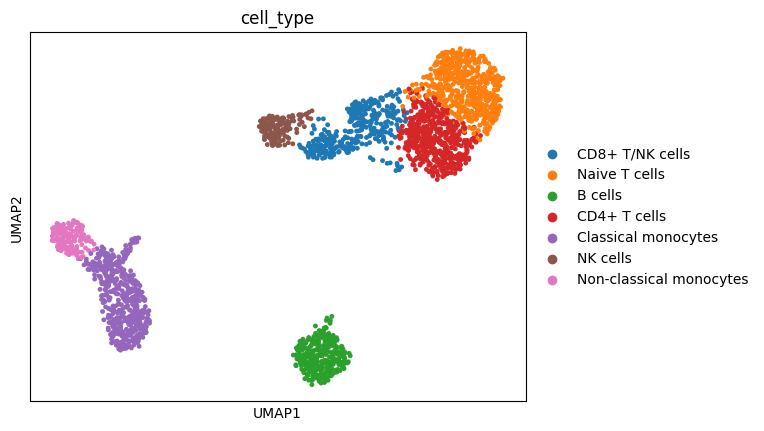

In [5]:
sc.pl.umap(adata, color="cell_type")

Get prior knowledge network from decoupler

In [6]:
progeny = dc.get_progeny(organism='human', top=500)
# source: pathway -> target: gene
# weights: strength of gene induction by pathway
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


In [7]:
dc.run_mlm(
    mat=adata,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False
)

Running mlm on mat with 2482 samples and 13629 targets for 14 sources.


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
adata.obsm['mlm_estimate']


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
AAACATACAACCAC-1,0.465844,3.476885,-1.036002,1.004744,-0.191265,-2.482890,-0.316311,-0.892434,-0.090426,2.224690,-0.646214,-1.270380,1.690538,-5.742222
AAACATTGAGCTAC-1,-0.529006,2.570765,-1.124651,1.356324,1.514717,-3.533303,-1.771440,0.162232,-1.463119,2.257896,0.887188,-1.339844,0.889952,-7.659526
AAACATTGATCAGC-1,0.109470,2.774910,-1.230686,1.589175,1.481312,-2.618697,-1.305899,-0.261564,-0.424122,3.033504,-0.221979,-1.120427,0.327302,-3.060800
AAACCGTGCTTCCG-1,-1.363462,3.128603,-0.274492,0.956869,7.190866,-3.882167,-3.217232,-2.061641,-0.211229,3.681974,0.747896,-1.124505,1.511617,-3.044948
AAACCGTGTATGCG-1,0.145758,2.344882,-0.566434,1.062373,3.406333,-0.116679,-0.009995,-1.605962,0.304669,0.751531,0.205426,-0.252675,0.026339,-0.249061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACACCTGA-1,-0.128307,3.080568,-0.201677,0.300482,3.801309,-3.477562,-3.676057,-1.284769,-1.358767,3.772752,0.997743,-0.750300,0.485321,-2.607781
TTTCGAACTCTCAT-1,-1.029780,3.424327,-0.334797,2.343122,8.128823,-3.249037,-3.088003,0.013889,0.226656,3.696291,0.092515,-1.711845,1.264227,-1.020499
TTTCTACTGAGGCA-1,1.553320,1.589839,0.035307,0.315905,3.361138,-3.071364,-1.282834,1.319457,-1.726027,1.586607,-1.834508,-0.946166,1.085253,-1.919795
TTTCTACTTCCTCG-1,1.043969,2.208630,-1.594282,0.929671,1.771674,-2.457924,-0.964194,-1.680704,0.425259,1.848240,1.929582,-1.392057,0.632849,-5.735324


In [9]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 2482 × 14
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden', 'cell_type'
    uns: 'cell_type_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'mlm_estimate', 'mlm_pvals'

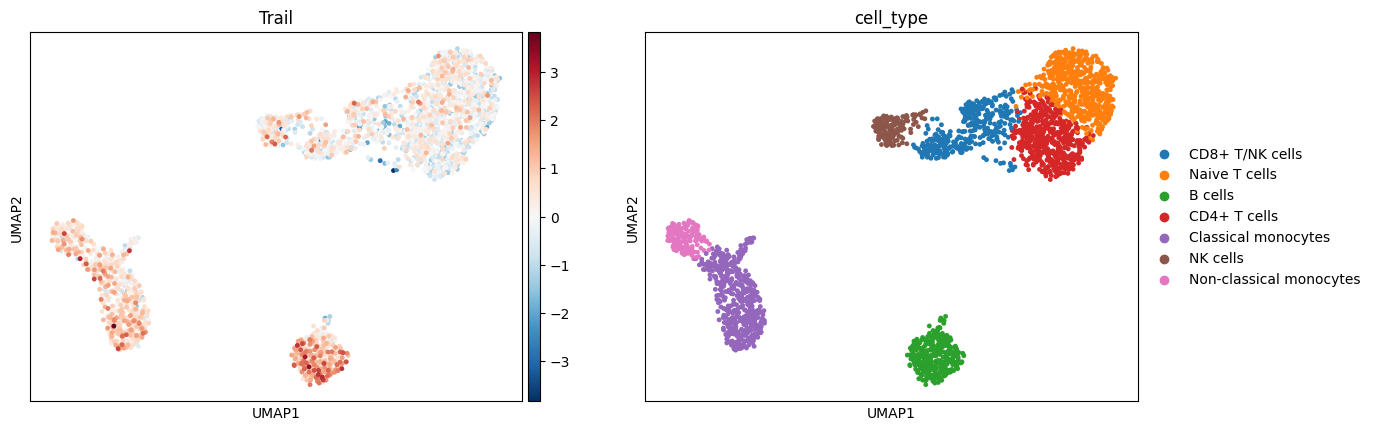

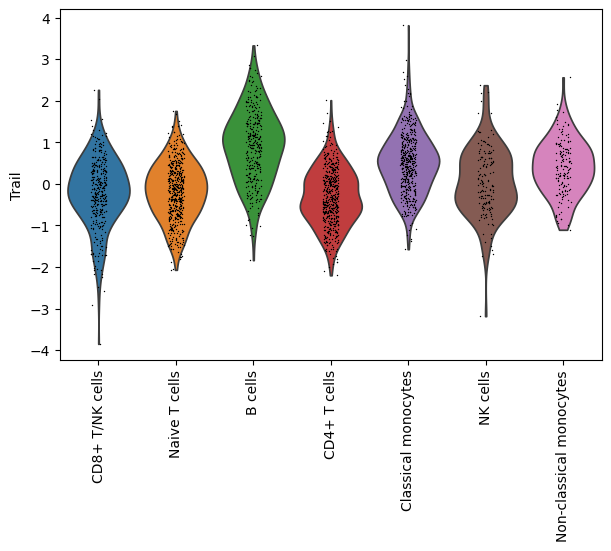

In [10]:
sc.pl.umap(acts, color=['Trail', 'cell_type'], cmap='RdBu_r', vcenter=0)
sc.pl.violin(acts, keys=['Trail'], groupby='cell_type', rotation=90)

The data suggests that the pro-apoptotic Trail pathway is more active in B cells. 

## Session info 

In [11]:
import session_info
session_info.show(excludes=['distributed'])

/Users/lucas-diedrich/anaconda3/envs/spatialdata/lib/python3.11/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)
